In [1]:
import torch
import torchvision
import numpy as np
from torch import nn
from torch import optim
from torch.autograd import Variable

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [7]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

In [12]:
train_dataset = torchvision.datasets.MNIST(
    root='./data_mnist/',
    train=True,
    transform=transform,
    download=True
)
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=4,
    shuffle=True
)

In [13]:
test_dataset = torchvision.datasets.MNIST(
    root='./data_mnist/',
    train=False,
    transform=transform,
    download=True
)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=4,
    shuffle=False
)

In [45]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fltn = nn.Flatten()
        self.fc1 = nn.Linear(784, 128)
        self.drop = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.fltn(x)
        x = F.relu(self.fc1(x))
        x = self.drop(x)
        x = self.fc2(x)
        return x

net = Net().to('cpu')

In [46]:
criterion = nn.CrossEntropyLoss()
optimizer =optim.SGD(net.parameters(), lr=0.001,momentum=0.9)
                     #momentum=0.9)

In [48]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data[0], data[1]
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 1000 == 0:
            print(f'[{epoch+1}, {i+1}] loss: {running_loss / 2000}')
            running_loss = 0.0
print('Training finished')

[1, 1] loss: 2.6284318417310715e-05
[1, 1001] loss: 0.08350747516979026
[1, 2001] loss: 0.08977917545603123
[1, 3001] loss: 0.1017888800073415
[1, 4001] loss: 0.09353177117577434
[1, 5001] loss: 0.08413253861324484
[1, 6001] loss: 0.08670733475917769
[1, 7001] loss: 0.09355020673941908
[1, 8001] loss: 0.09123862384647509
[1, 9001] loss: 0.08136499430167896
[1, 10001] loss: 0.08669062691725413
[1, 11001] loss: 0.08320595206322287
[1, 12001] loss: 0.08627749604181008
[1, 13001] loss: 0.08221377623020452
[1, 14001] loss: 0.08091598092090499
[2, 1] loss: 1.103260205127299e-06
[2, 1001] loss: 0.07063278559325772
[2, 2001] loss: 0.07014735875518636
[2, 3001] loss: 0.08060494930293498
[2, 4001] loss: 0.08140051732669235
[2, 5001] loss: 0.08054287784579083
[2, 6001] loss: 0.06705235933851508
[2, 7001] loss: 0.08274286196592402
[2, 8001] loss: 0.07834931250309092
[2, 9001] loss: 0.07679016101564412
[2, 10001] loss: 0.07619123577764095
[2, 11001] loss: 0.07961929728737414
[2, 12001] loss: 0.0781

In [49]:
data_iter = iter(test_loader)

In [56]:
images, labels = data_iter.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:  [tensor(4)] [tensor(1)] [tensor(4)] [tensor(9)]


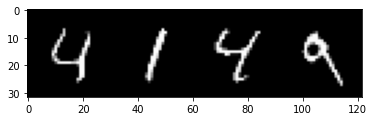

In [70]:
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.imshow(imgs.permute(1,2, 0).numpy())
print('GroundTruth: ', ' '.join('%5s' % [labels[j]] for j in range(4)))

In [71]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{predicted[j]}' for j in range(4)))

Predicted:  4 1 4 9
